### <code>Non LLM base workflow</code>

In [2]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [3]:
class BMIState(TypedDict):
    height_cm: float
    weight_kg: float
    bmi: float

In [4]:
def calculate_bmi(state: BMIState) -> BMIState:
    height_m = state['height_cm'] / 100
    bmi = state['weight_kg'] / (height_m ** 2)
    state['bmi'] = round(bmi, 2)
    return state

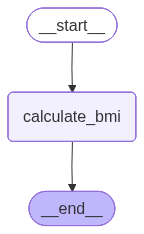

In [7]:
graph = StateGraph(BMIState)
graph.add_node("calculate_bmi",calculate_bmi)
graph.add_edge(START,"calculate_bmi")
graph.add_edge("calculate_bmi",END)

workflow = graph.compile()
workflow

In [8]:
workflow.invoke({"height_cm": 170, "weight_kg": 65})

{'height_cm': 170, 'weight_kg': 65, 'bmi': 22.49}

### <code>LLM Base Workflow</code>

In [45]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()

True

In [35]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0)

In [36]:
class BlogState(TypedDict):
  title: str
  outline: str
  content: str

In [37]:
def create_outline(state: BlogState) -> BlogState:
    title = state["title"]
    prompt = f"Create a detailed outline for a blog post titled: '{title}'"
    outline = model.invoke(prompt).content
    state["outline"] = outline
    return state

In [38]:
def create_blog(state: BlogState) -> BlogState:
    outline = state["outline"]
    prompt = f"Write a comprehensive blog post based on the following outline:\n{outline}"
    content = model.invoke(prompt).content
    state["content"] = content
    return state

In [ ]:
# create graph
graph = StateGraph(state_schema=BlogState)

# create node
graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)

# create edge
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog")
graph.add_edge("create_blog", END)

# compilation
worlkflow = graph.compile()

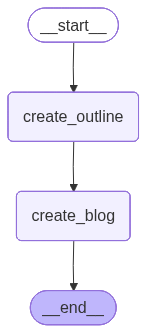

In [40]:
worlkflow

In [ ]:
initial_state = BlogState(title="How AI is Transforming Education Explain in single line", outline="", content="")
# run
final_state = worlkflow.invoke(initial_state)

In [44]:
final_state

{'title': 'How AI is Transforming Education Explain in single line',
 'outline': 'Here\'s a detailed outline for your blog post, incorporating the "single line" explanation as the core thesis statement.\n\n---\n\n## Blog Post Title: How AI is Transforming Education\n\n### Single Line Explanation (Core Thesis):\n**AI is fundamentally reshaping education by personalizing learning experiences, automating administrative tasks, and providing unprecedented access to resources, ultimately fostering more engaging and effective learning environments.**\n\n---\n\n### Detailed Outline:\n\n**I. Introduction (Approx. 150-200 words)**\n    *   **A. Hook:** Start with a relatable scenario – the traditional classroom vs. the evolving digital landscape, or a common challenge in education (e.g., one-size-fits-all learning, teacher workload).\n    *   **B. Context:** Briefly introduce the rapid advancements of Artificial Intelligence and its increasing integration into various sectors, including educatio